<a href="https://colab.research.google.com/github/shreya4721/Personality-Detection/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk scikit-learn pandas numpy transformers torch imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertModel
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mbti_1.csv to mbti_1.csv


In [ ]:
filename = list(uploaded.keys())[0]

In [ ]:
df = pd.read_csv(filename)

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets
    text = text.lower().strip()
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove Stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertModel
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# ... (rest of the existing code) ...

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets
    text = text.lower().strip()
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove Stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df['cleaned_posts'] = df['posts'].astype(str).apply(clean_text)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_posts']).toarray()

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9280231963158793
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       376
           1       0.95      0.88      0.91       360
           2       1.00      0.99      0.99       401
           3       0.94      0.90      0.92       344
           4       1.00      1.00      1.00       382
           5       1.00      0.99      1.00       371
           6       1.00      1.00      1.00       351
           7       0.99      0.98      0.99       391
           8       0.81      0.74      0.77       360
           9       0.61      0.82      0.70       345
          10       0.87      0.77      0.82       379
          11       0.83      0.87      0.85       344
          12       0.99      0.99      0.99       350
          13       0.98      0.98      0.98       387
          14       0.99      0.98      0.98       353
          15       0.97      0.96      0.97       369

    accuracy                         

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9324577861163227
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       376
           1       0.93      0.90      0.92       360
           2       0.98      1.00      0.99       401
           3       0.90      0.92      0.91       344
           4       0.98      1.00      0.99       382
           5       1.00      1.00      1.00       371
           6       1.00      1.00      1.00       351
           7       0.99      1.00      1.00       391
           8       0.80      0.71      0.75       360
           9       0.74      0.74      0.74       345
          10       0.84      0.81      0.83       379
          11       0.84      0.85      0.85       344
          12       0.99      1.00      1.00       350
          13       0.98      0.98      0.98       387
          14       0.98      1.00      0.99       353
          15       0.95      0.97      0.96       369

    accuracy                           0.93    

In [ ]:
df['I_E'] = df['type'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
df['S_N'] = df['type'].apply(lambda x: 'S' if x[1] == 'S' else 'N')
df['T_F'] = df['type'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
df['J_P'] = df['type'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

In [ ]:
trait_accuracies = {}


In [ ]:
def train_and_evaluate(trait_column, trait_name):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[trait_column])

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    trait_accuracies[trait_name] = accuracy
    print(f"Accuracy for {trait_name}: {accuracy:.4f}")

In [ ]:
# Train and evaluate each MBTI dichotomy
train_and_evaluate('I_E', "Introversion (I) vs Extroversion (E)")
train_and_evaluate('S_N', "Sensing (S) vs Intuition (N)")
train_and_evaluate('T_F', "Thinking (T) vs Feeling (F)")
train_and_evaluate('J_P', "Judging (J) vs Perceiving (P)")

Accuracy for Introversion (I) vs Extroversion (E): 0.8023
Accuracy for Sensing (S) vs Intuition (N): 0.8588
Accuracy for Thinking (T) vs Feeling (F): 0.8098
Accuracy for Judging (J) vs Perceiving (P): 0.7337


In [ ]:
from sklearn.svm import SVC

In [ ]:
def train_and_evaluate(trait_column, trait_name):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[trait_column])

    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

    model = SVC(kernel='linear', probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    trait_accuracies[trait_name] = accuracy
    print(f"Accuracy for {trait_name}: {accuracy:.4f}")

In [ ]:
train_and_evaluate('I_E', "Introversion (I) vs Extroversion (E)")
train_and_evaluate('S_N', "Sensing (S) vs Intuition (N)")
train_and_evaluate('T_F', "Thinking (T) vs Feeling (F)")
train_and_evaluate('J_P', "Judging (J) vs Perceiving (P)")

Accuracy for Introversion (I) vs Extroversion (E): 0.8548
Accuracy for Sensing (S) vs Intuition (N): 0.8974
Accuracy for Thinking (T) vs Feeling (F): 0.8363
Accuracy for Judging (J) vs Perceiving (P): 0.7856


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=42faa146ec64083cc98304cce62598b456e46d2b1331970dd1f3787ce382b20b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Extract personality traits as separate binary labels
df['I_E'] = df['type'].apply(lambda x: 1 if 'I' in x else 0)  # 1 = Introvert, 0 = Extrovert
df['N_S'] = df['type'].apply(lambda x: 1 if 'N' in x else 0)  # 1 = Intuition, 0 = Sensing
df['T_F'] = df['type'].apply(lambda x: 1 if 'T' in x else 0)  # 1 = Thinking, 0 = Feeling
df['J_P'] = df['type'].apply(lambda x: 1 if 'J' in x else 0)  # 1 = Judging, 0 = Perceiving


In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Convert text into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['posts'])

# Train models for each trait
traits = ['I_E', 'N_S', 'T_F', 'J_P']
models = {}

for trait in traits:
    y = df[trait]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = SVC(kernel='linear', probability=True, random_state=42)
    model.fit(X_train, y_train)

    models[trait] = (model, X_test, y_test)


In [ ]:
import lime
import lime.lime_text
import numpy as np

explainer = lime.lime_text.LimeTextExplainer(class_names=["0", "1"])  # Binary classification

def explain_lime(model, vectorizer, sample_text):
    """Generate LIME explanation for a given sample text"""
    def predict_proba(texts):
        X_text = vectorizer.transform(texts)
        return model.predict_proba(X_text)

    exp = explainer.explain_instance(sample_text, predict_proba, num_features=10)
    return exp

# Select a random text sample
sample_text = df['posts'].iloc[100]  # Change index as needed

# Generate LIME explanations for each trait model
for trait in traits:
    model, X_test, y_test = models[trait]
    explanation = explain_lime(model, tfidf_vectorizer, sample_text)

    print(f"\n🔹 Explanation for {trait}:")
    explanation.show_in_notebook(text=sample_text)



🔹 Explanation for I_E:



🔹 Explanation for N_S:



🔹 Explanation for T_F:



🔹 Explanation for J_P:


In [ ]:
!pip install nltk scikit-learn pandas numpy transformers torch imbalanced-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from transformers import BertTokenizer, BertModel
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

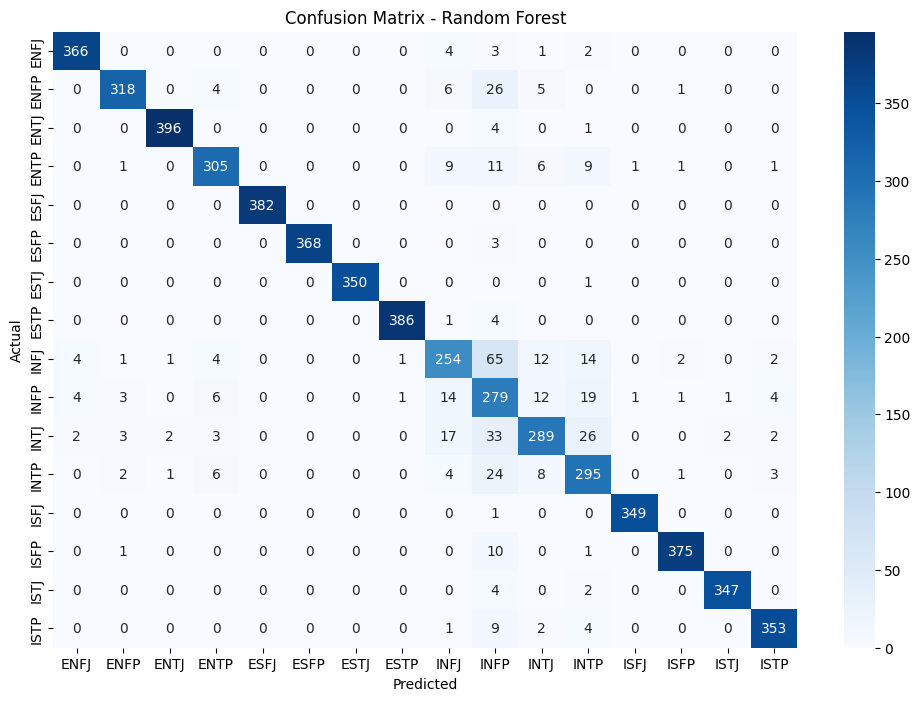

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
y_prob_rf = rf_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

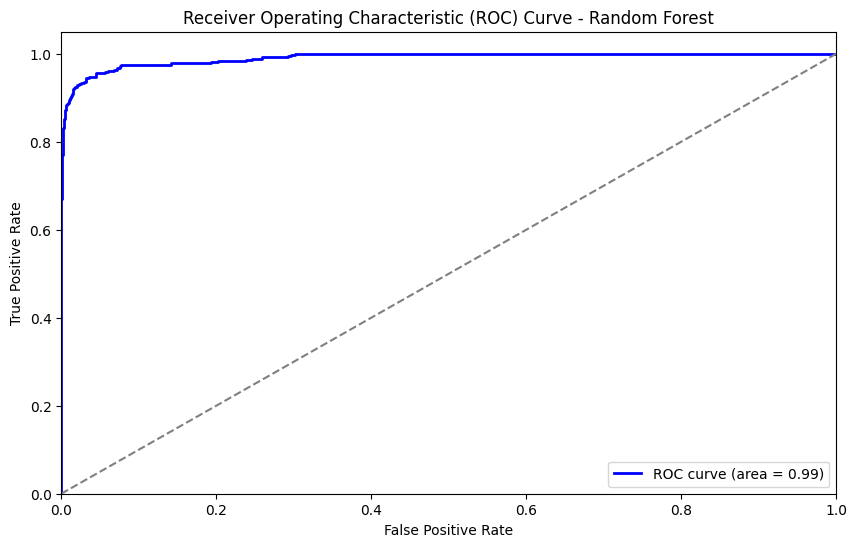

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

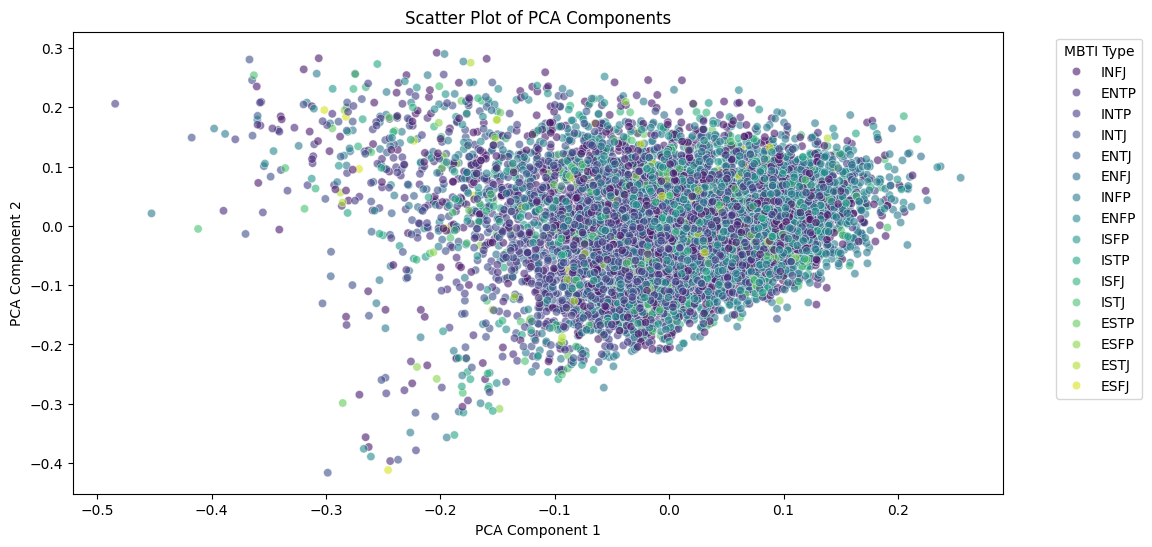

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['type'], palette="viridis", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Scatter Plot of PCA Components")
plt.legend(title="MBTI Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()